In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Normalization
from tensorflow.keras.models import Sequential, Model

In [2]:
print(tf.__version__)

2.8.0


In [3]:
SHUFFLE_BUFFER = 500
BATCH_SIZE = 2

In [4]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

#### Read the CSV file using pandas

In [5]:
df = pd.read_csv(csv_file)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


If label data is not devided in data, devide label data and train data

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

In [8]:
target = df.pop('target')

### A DataFrame as an array
###### distinguish numeric data which is not categorical
age, trestbps, chol, thalach, oldpeak

In [9]:
for name, values in df.items():
    print(name)
    print(df[name].unique())
    print(df[name].nunique())
    print('==================================================================================')

age
[63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 51 45 39 68 47 35 29 70 46 77 38 34 74 76 71]
41
sex
[1 0]
2
cp
[1 4 3 2 0]
5
trestbps
[145 160 120 130 140 172 150 110 132 117 135 155 125 104 180 138 108 128
 100 200 124  94 122 170 105 165 112 102 152 115 118 101 126 142 174 134
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
50
chol
[233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 269 267 248 197 360 258 308 245 270 208 264 321 274 325 235 257 302
 164 231 141 252 255 183 330 222 217 282 288 220 209 227 261 213 174 281
 198 221 205 309 240 289 318 298 265 564 246 322 299 300 293 277 304 214
 207 160 249 394 212 184 315 409 244 305 195 196 273 126 313 259 200 262
 215 228 193 303 271 210 327 149 201 295 306 178 237 218 223 242 319 166
 180 311 278 232 253 342 169 187 157 176 241 131 175 417 290 172 216 188
 185 326 260 182 307 186 341 407]

In [10]:
numeric_features_names = ['age', 'thalach', 'trestbps', 'chol', 'oldpeak']
numeric_features = df[numeric_features_names]
numeric_features.head()

,age,thalach,trestbps,chol,oldpeak
0,63,150,145,233,2.3
1,67,108,160,286,1.5
2,67,129,120,229,2.6
3,37,187,130,250,3.5
4,41,172,130,204,1.4


In [11]:
 tf.convert_to_tensor(numeric_features)

Metal device set to: Apple M1


2022-08-06 13:56:35.019269: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-06 13:56:35.019359: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(303, 5), dtype=float64, numpy=
array([[ 63. , 150. , 145. , 233. ,   2.3],
       [ 67. , 108. , 160. , 286. ,   1.5],
       [ 67. , 129. , 120. , 229. ,   2.6],
       ...,
       [ 65. , 127. , 135. , 254. ,   2.8],
       [ 48. , 150. , 130. , 256. ,   0. ],
       [ 63. , 154. , 150. , 407. ,   4. ]])>

#### With model.fit

In [12]:
normalizer = Normalization(axis=-1)
normalizer.adapt(numeric_features)
normalizer(numeric_features.iloc[:3])

2022-08-06 13:56:35.056038: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-06 13:56:35.106304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-06 13:56:35.120615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.933839  ,  0.03480718,  0.7457807 , -0.26008663,  1.0680454 ],
       [ 1.3782104 , -1.7806164 ,  1.5923283 ,  0.75738764,  0.38022867],
       [ 1.3782104 , -0.87290466, -0.66513205, -0.33687714,  1.3259766 ]],
      dtype=float32)>

In [13]:
a = [[ 0.933839,  0.03480718,  0.7457807, -0.26008663,  1.0680454]]
a = [[ 1,  2,  3, 4,  5]]
# a = tf.convert_to_tensor(a, dtype=tf.float32)

In [14]:
normalizer_dogs = Normalization(axis=-1)
normalizer_dogs.adapt(a)
normalizer_dogs(numeric_features.iloc[:3])

# ValueError: All `axis` values to be kept must have known shape. 
# Got axis: (0,), input shape: [None, 5], with unknown axis at index: 0

# why is input shape None........
# numeric_features shape is [303, 5], 
# tf.convert_to_tensor(numeric_features) shape is [303, 5]

2022-08-06 13:56:35.247286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-06 13:56:35.263017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 6.20e+08,  1.48e+09,  1.42e+09,  2.29e+09, -2.70e+07],
       [ 6.60e+08,  1.06e+09,  1.57e+09,  2.82e+09, -3.50e+07],
       [ 6.60e+08,  1.27e+09,  1.17e+09,  2.25e+09, -2.40e+07]],
      dtype=float32)>

In [15]:
def get_basic_model():
    model = Sequential([
        normalizer,
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1)
    ])
    
    model.compile(optimizer='adam',
                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 metrics=['accuracy'])
    
    return model

def get_dogs_model():
    model = Sequential([
        normalizer_dogs,
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1)
    ])
    
    model.compile(optimizer='adam',
                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 metrics=['accuracy'])
    
    return model

In [16]:
model = get_basic_model()
model.fit(numeric_features, target, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15
 11/152 [=>............................] - ETA: 0s - loss: 0.9172 - accuracy: 0.4545 

2022-08-06 13:56:35.581282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - 1s 5ms/step - loss: 0.8134 - accuracy: 0.5644
Epoch 2/15
152/152 [==============================] - 1s 5ms/step - loss: 0.5946 - accuracy: 0.7063
Epoch 3/15
152/152 [==============================] - 1s 5ms/step - loss: 0.5224 - accuracy: 0.7294
Epoch 4/15
152/152 [==============================] - 1s 5ms/step - loss: 0.4899 - accuracy: 0.7294
Epoch 5/15
152/152 [==============================] - 1s 5ms/step - loss: 0.4733 - accuracy: 0.7360
Epoch 6/15
152/152 [==============================] - 1s 5ms/step - loss: 0.4621 - accuracy: 0.7426
Epoch 7/15
152/152 [==============================] - 1s 5ms/step - loss: 0.4552 - accuracy: 0.7525
Epoch 8/15
152/152 [==============================] - 1s 5ms/step - loss: 0.4503 - accuracy: 0.7591
Epoch 9/15
152/152 [==============================] - 1s 5ms/step - loss: 0.4459 - accuracy: 0.7690
Epoch 10/15
152/152 [==============================] - 1s 5ms/step - loss: 0.4415 - accuracy: 0.7756
Epoch 11/1

In [17]:
model_dogs = get_dogs_model()
model_dogs.fit(numeric_features, target, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15
 20/152 [==>...........................] - ETA: 0s - loss: 180753968.0000 - accuracy: 0.3500

2022-08-06 13:56:47.536828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - 1s 5ms/step - loss: 36523724.0000 - accuracy: 0.5644
Epoch 2/15
152/152 [==============================] - 1s 5ms/step - loss: 9476831.0000 - accuracy: 0.6073
Epoch 3/15
152/152 [==============================] - 1s 5ms/step - loss: 7368941.5000 - accuracy: 0.6205
Epoch 4/15
152/152 [==============================] - 1s 5ms/step - loss: 6249651.0000 - accuracy: 0.6964
Epoch 5/15
152/152 [==============================] - 1s 5ms/step - loss: 4131884.0000 - accuracy: 0.6766
Epoch 6/15
152/152 [==============================] - 1s 5ms/step - loss: 4832949.5000 - accuracy: 0.6898
Epoch 7/15
152/152 [==============================] - 1s 5ms/step - loss: 4179791.2500 - accuracy: 0.6601
Epoch 8/15
152/152 [==============================] - 1s 5ms/step - loss: 3487752.5000 - accuracy: 0.6931
Epoch 9/15
152/152 [==============================] - 1s 5ms/step - loss: 4296720.0000 - accuracy: 0.6964
Epoch 10/15
152/152 [==============================] - 1

#### With tf.data

In [18]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((numeric_features, target))

for row in numeric_dataset.take(3):
    print(row)

(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 63. , 150. , 145. , 233. ,   2.3])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 108. , 160. , 286. ,   1.5])>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 129. , 120. , 229. ,   2.6])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [19]:
numeric_batchs = numeric_dataset.shuffle(1000).batch(BATCH_SIZE)

model = get_basic_model()
model.fit(numeric_batchs, epochs=15)

Epoch 1/15
 21/152 [===>..........................] - ETA: 0s - loss: 0.7663 - accuracy: 0.6667

2022-08-06 13:56:59.372645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - 1s 5ms/step - loss: 0.6568 - accuracy: 0.7756
Epoch 2/15
152/152 [==============================] - 1s 5ms/step - loss: 0.5563 - accuracy: 0.7591
Epoch 3/15
152/152 [==============================] - 1s 5ms/step - loss: 0.4977 - accuracy: 0.7690
Epoch 4/15
152/152 [==============================] - 1s 5ms/step - loss: 0.4624 - accuracy: 0.7855
Epoch 5/15
152/152 [==============================] - 1s 5ms/step - loss: 0.4449 - accuracy: 0.7855
Epoch 6/15
152/152 [==============================] - 1s 5ms/step - loss: 0.4365 - accuracy: 0.7888
Epoch 7/15
152/152 [==============================] - 1s 5ms/step - loss: 0.4298 - accuracy: 0.7822
Epoch 8/15
152/152 [==============================] - 1s 5ms/step - loss: 0.4266 - accuracy: 0.7954
Epoch 9/15
152/152 [==============================] - 1s 5ms/step - loss: 0.4240 - accuracy: 0.7789
Epoch 10/15
152/152 [==============================] - 1s 5ms/step - loss: 0.4224 - accuracy: 0.7855
Epoch 11/1

In [20]:
model_dogs = get_dogs_model()
model_dogs.fit(numeric_batchs, epochs=15)

Epoch 1/15
 21/152 [===>..........................] - ETA: 0s - loss: 189619744.0000 - accuracy: 0.3095

2022-08-06 13:57:11.389229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - 1s 5ms/step - loss: 39186428.0000 - accuracy: 0.5413
Epoch 2/15
152/152 [==============================] - 1s 5ms/step - loss: 8677710.0000 - accuracy: 0.6271
Epoch 3/15
152/152 [==============================] - 1s 5ms/step - loss: 7104336.5000 - accuracy: 0.6436
Epoch 4/15
152/152 [==============================] - 1s 5ms/step - loss: 5610213.0000 - accuracy: 0.6832
Epoch 5/15
152/152 [==============================] - 1s 5ms/step - loss: 4262812.0000 - accuracy: 0.6568
Epoch 6/15
152/152 [==============================] - 1s 5ms/step - loss: 5589356.5000 - accuracy: 0.6370
Epoch 7/15
152/152 [==============================] - 1s 5ms/step - loss: 3677509.5000 - accuracy: 0.6832
Epoch 8/15
152/152 [==============================] - 1s 5ms/step - loss: 4411014.0000 - accuracy: 0.6865
Epoch 9/15
152/152 [==============================] - 1s 5ms/step - loss: 4294889.5000 - accuracy: 0.7063
Epoch 10/15
152/152 [==============================] - 1

### A Datafram as a Dictionary

In [21]:
numeric_dict_ds = tf.data.Dataset.from_tensor_slices((dict(numeric_features), target))

In [22]:
for row in numeric_dict_ds.take(5):
    print(row, end='\n\n\n')

({'age': <tf.Tensor: shape=(), dtype=int64, numpy=63>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=150>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=145>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=233>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=2.3>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


({'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=108>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=160>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=286>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=1.5>}, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


({'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=129>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=120>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=229>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=2.6>}, <tf.Tensor: shape=(), dtype=int64, numpy=0

#### Dictionary with Keras
There are two equivalent ways you can write a Keras model that accepts a dictionary as input.

##### 1. The Model-subclass style
You write a subclass of tf.keras.Model (or tf.keras.Layer). You directly handle the inputs, and create the outputs:

In [23]:
def stack_dict(inputs, fun=tf.stack):
    values = []
    for key in sorted(inputs.keys()):
        values.append(tf.cast(inputs[key], dtype=tf.float32))
    
    return fun(values, axis=-1)

In [24]:
class MyModel(tf.keras.Model):
    def __init__(self):
        # Create all the internal layers in init.
        super().__init__(self)

        self.normalizer = tf.keras.layers.Normalization(axis=-1)

        self.seq = tf.keras.Sequential([
          self.normalizer,
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(1)
        ])

    def adapt(self, inputs):
        # Stack the inputs and `adapt` the normalization layer.
        inputs = stack_dict(inputs)
        self.normalizer.adapt(inputs)

    def call(self, inputs):
        # Stack the inputs
        inputs = stack_dict(inputs)
        # Run them through all the layers.
        result = self.seq(inputs)

        return result

In [25]:
model = MyModel()
model.adapt(dict(numeric_features))
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'],
             run_eagerly=True)

2022-08-06 13:57:23.129339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-06 13:57:23.143978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [26]:
%%time
model.fit(dict(numeric_features), target, epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 23ms/step - loss: 0.7800 - accuracy: 0.6469
Epoch 2/5
10/10 [==============================] - 0s 16ms/step - loss: 0.7346 - accuracy: 0.6997
Epoch 3/5
10/10 [==============================] - 0s 15ms/step - loss: 0.7000 - accuracy: 0.6964
Epoch 4/5
10/10 [==============================] - 0s 16ms/step - loss: 0.6711 - accuracy: 0.7162
Epoch 5/5
10/10 [==============================] - 0s 15ms/step - loss: 0.6457 - accuracy: 0.7294
CPU times: user 737 ms, sys: 201 ms, total: 938 ms
Wall time: 1.05 s


In [27]:
model.predict(dict(numeric_features.iloc[:3]))

array([[[-0.18686269]],

       [[-0.0657729 ]],

       [[-0.26595226]]], dtype=float32)

In [28]:
model = MyModel()
model.adapt(dict(numeric_features))
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'],
             run_eagerly=True)

2022-08-06 13:57:24.345364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-06 13:57:24.359711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [29]:
%%time
model.fit(dict(numeric_features), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 [==============================] - 2s 15ms/step - loss: 0.6800 - accuracy: 0.6964
Epoch 2/5
152/152 [==============================] - 2s 15ms/step - loss: 0.5502 - accuracy: 0.7360
Epoch 3/5
152/152 [==============================] - 2s 15ms/step - loss: 0.4894 - accuracy: 0.7525
Epoch 4/5
152/152 [==============================] - 2s 15ms/step - loss: 0.4637 - accuracy: 0.7591
Epoch 5/5
152/152 [==============================] - 2s 15ms/step - loss: 0.4512 - accuracy: 0.7855
CPU times: user 7.51 s, sys: 2.63 s, total: 10.1 s
Wall time: 11.5 s


In [30]:
model.predict(dict(numeric_features.iloc[:3]))

array([[[-0.27601996]],

       [[ 0.4095216 ]],

       [[-0.01667248]]], dtype=float32)

In [31]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)

In [32]:
model = MyModel()
model.adapt(dict(numeric_features))
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'],
             run_eagerly=True)

2022-08-06 13:57:36.011687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-06 13:57:36.026189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [33]:
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5
152/152 [==============================] - 2s 14ms/step - loss: 0.6754 - accuracy: 0.7030
Epoch 2/5
152/152 [==============================] - 2s 14ms/step - loss: 0.5468 - accuracy: 0.7426
Epoch 3/5
152/152 [==============================] - 2s 14ms/step - loss: 0.4878 - accuracy: 0.7558
Epoch 4/5
152/152 [==============================] - 2s 14ms/step - loss: 0.4612 - accuracy: 0.7657
Epoch 5/5
152/152 [==============================] - 2s 14ms/step - loss: 0.4515 - accuracy: 0.7789


    Here are the predictions for the first three examples:

In [34]:
model.predict(dict(numeric_features.iloc[:3]))

array([[[-0.3825685 ]],

       [[ 0.303802  ]],

       [[-0.03092463]]], dtype=float32)

##### 2. The Keras functional style

In [35]:
inputs = {}
for name, column in numeric_features.items():
    inputs[name] = tf.keras.Input(shape=(1, ), name=name, dtype=tf.float32)
    
inputs

{'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'thalach': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'thalach')>,
 'trestbps': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'trestbps')>,
 'chol': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'chol')>,
 'oldpeak': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'oldpeak')>}

In [36]:
x = stack_dict(inputs, fun=tf.concat)
x

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'tf.concat')>

In [37]:
inputs2 = {}
for name, column in numeric_features.items():
    inputs2[name] = column
y = stack_dict(inputs2)

In [38]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(y)

2022-08-06 13:57:47.160431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-06 13:57:47.174974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [39]:
x = normalizer(x)
x = Dense(10, activation='relu')(x)
x = Dense(10, activation='relu')(x)
x = Dense(1)(x)

In [40]:
model = tf.keras.Model(inputs, x)
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'],
             run_eagerly=True)

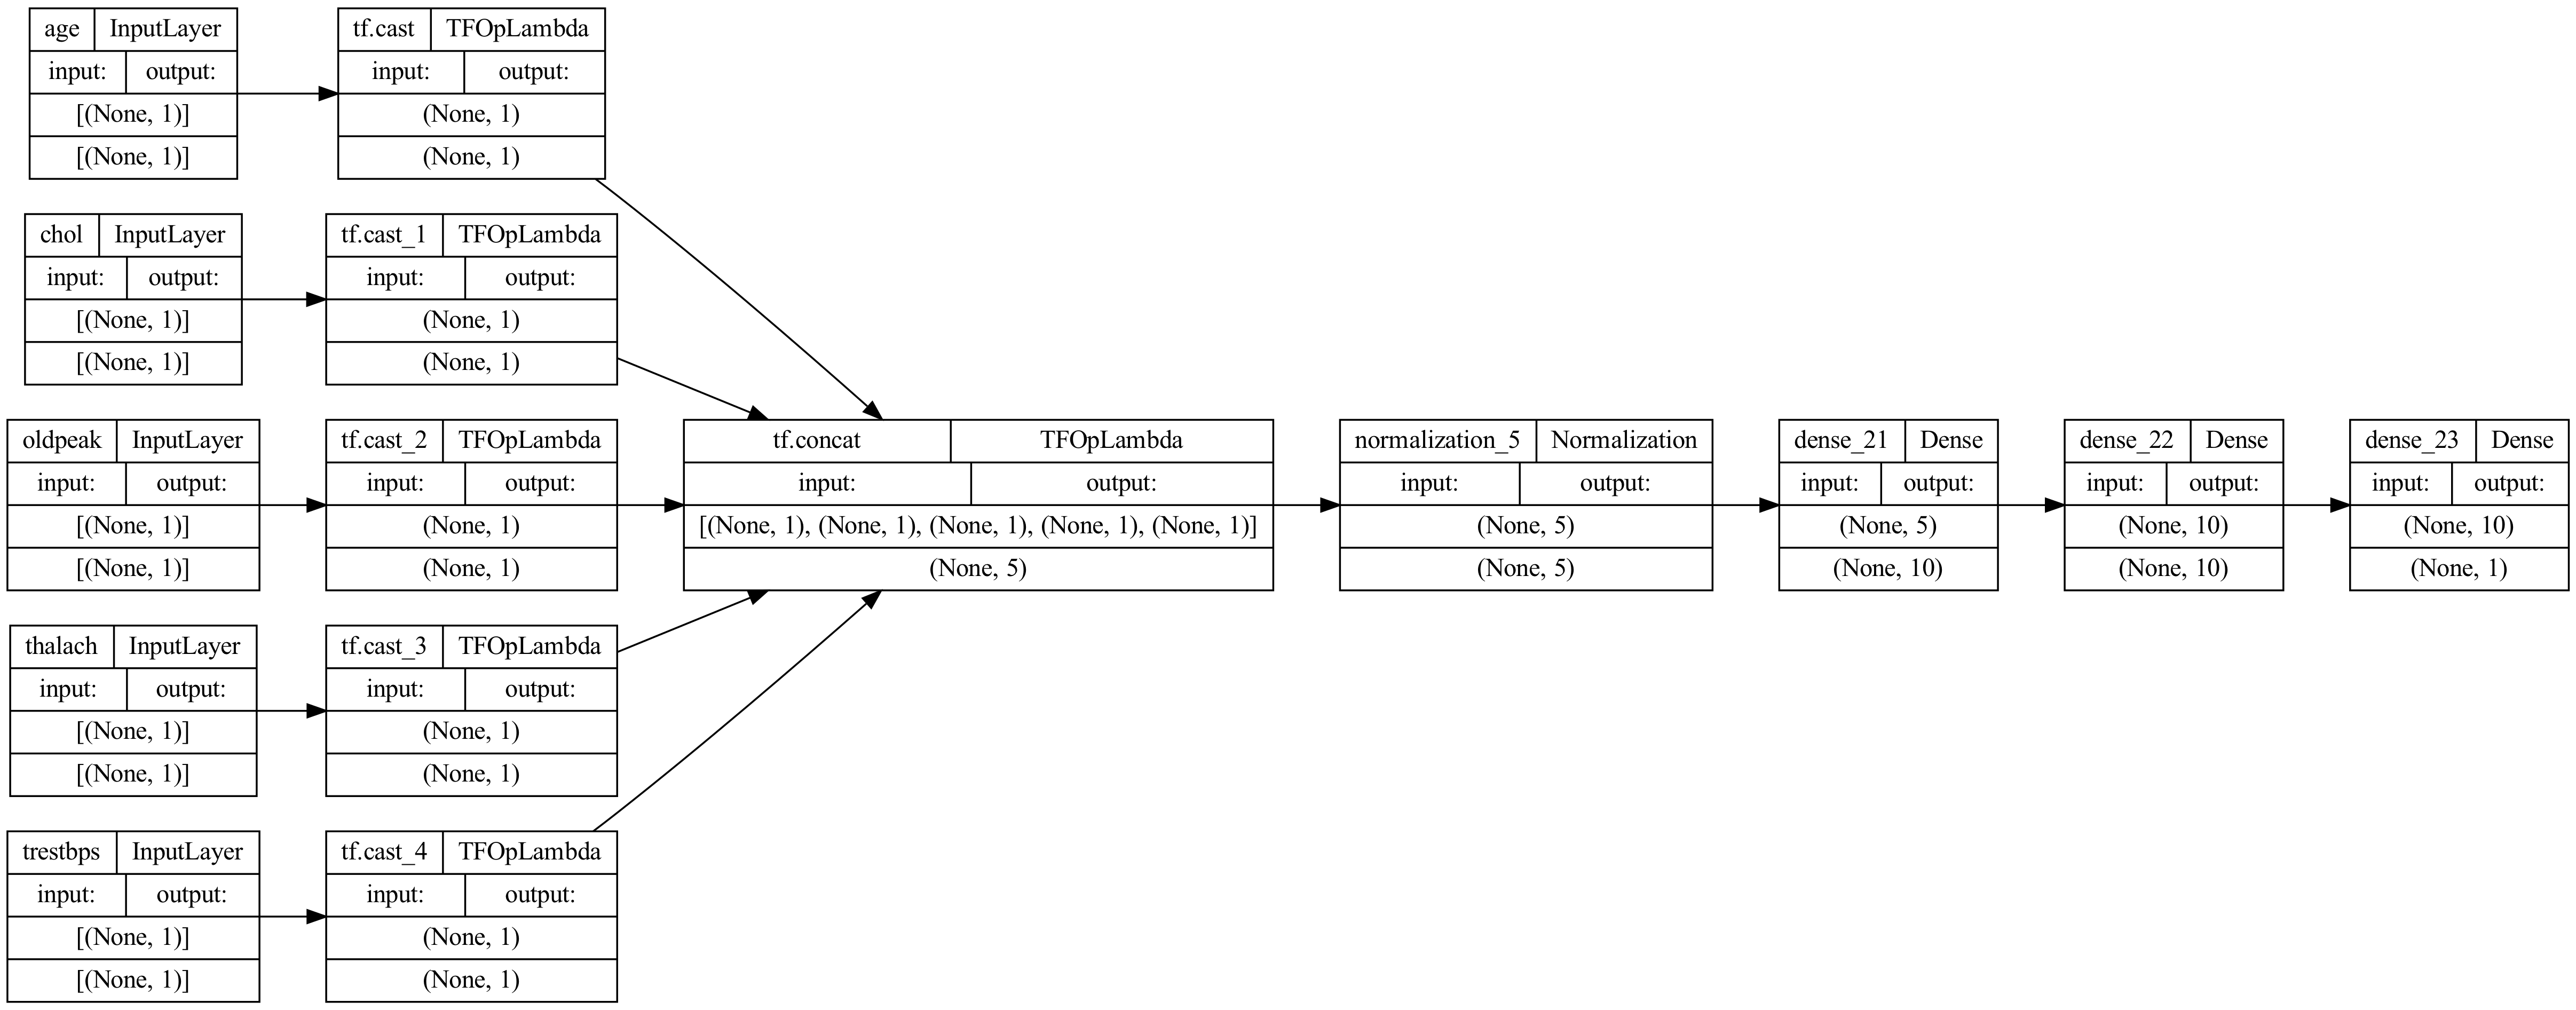

In [41]:
tf.keras.utils.plot_model(model, rankdir='LR', show_shapes=True, dpi=250)

In [42]:
model.fit(dict(numeric_features), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 [==============================] - 2s 14ms/step - loss: 0.6718 - accuracy: 0.7360
Epoch 2/5
152/152 [==============================] - 2s 14ms/step - loss: 0.5438 - accuracy: 0.7459
Epoch 3/5
152/152 [==============================] - 2s 14ms/step - loss: 0.4871 - accuracy: 0.7624
Epoch 4/5
152/152 [==============================] - 2s 13ms/step - loss: 0.4608 - accuracy: 0.7657
Epoch 5/5
152/152 [==============================] - 2s 14ms/step - loss: 0.4492 - accuracy: 0.7921


In [43]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5
152/152 [==============================] - 2s 15ms/step - loss: 0.4437 - accuracy: 0.8020
Epoch 2/5
152/152 [==============================] - 2s 15ms/step - loss: 0.4403 - accuracy: 0.7723
Epoch 3/5
152/152 [==============================] - 2s 14ms/step - loss: 0.4360 - accuracy: 0.8020
Epoch 4/5
152/152 [==============================] - 2s 15ms/step - loss: 0.4331 - accuracy: 0.8053
Epoch 5/5
152/152 [==============================] - 2s 14ms/step - loss: 0.4294 - accuracy: 0.8020
